# import thư viện

In [91]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# thêm dữ liệu từ keras

In [92]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [93]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [94]:
y_train.shape, y_test.shape

((60000,), (10000,))

# Hiển thị dữ liệu hình ảnh

In [95]:
# xem thu du lieu
import matplotlib.pyplot as plt
from PIL import Image

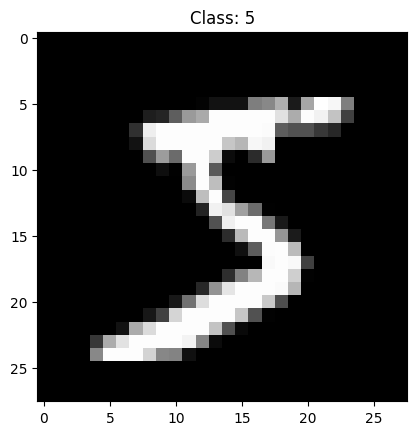

In [96]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap='gray')
plt.title(f"Class: {y_train[0]}")
plt.show()

# Biến đổi dữ liệu

In [97]:
# 0...255 -> 0...1
X_train = X_train.astype('float64') / 255
X_test = X_test.astype('float64') / 255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- `n` số hình (60000)
- `w` chiều rộng (28)
- `h` chiều cao (28)
- `d` direction (vì hình trắng đen nên chọn d = 1, hình có màu RGB thì d = 3)

In [98]:
# them chieu direction
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- `n` số hình (60000)
- `class` số lớp (kết quả gồm bao nhiêu loại khác nhau?)

In [99]:
my_classes = 10 # tu 0 -> 9
y_train = keras.utils.to_categorical(y_train, my_classes)
y_test = keras.utils.to_categorical(y_test, my_classes)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

# huấn luyện mô hình

In [100]:
# khai bao 
input_shape = (28, 28, 1)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    keras.layers.Conv2D(64, kernel_size=(3,3)), # them 1 layer de hoc nhieu hon (tang do phuc tap)
     keras.layers.MaxPooling2D(pool_size=(2,2)), 
     keras.layers.Flatten(), # lam phang thanh list 1 chieu
     keras.layers.Dense(my_classes, activation="softmax"), # phan loai (class)
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
# huan luyen
batch_size = 128 # số ảnh được xử lý mỗi lần mô hình cập nhật
epochs = 5 # số lần lặp qua toàn bộ dữ liệu huấn luyện
validation_split = 0.1 # tách 10% từ tập train thành validation, đảm bảo mô hình không bị overfitting
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9240 - loss: 0.2806 - val_accuracy: 0.9763 - val_loss: 0.0910
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9749 - loss: 0.0838 - val_accuracy: 0.9812 - val_loss: 0.0708
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9811 - loss: 0.0630 - val_accuracy: 0.9845 - val_loss: 0.0580
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9837 - loss: 0.0523 - val_accuracy: 0.9842 - val_loss: 0.0530
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9827 - val_loss: 0.0607


# đánh giá mô hình

In [102]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}") # ham mat mat tren tap test
print(f"Test accuracy: {accuracy}") # bao nhieu phan tram du doan dung tren tap test

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0510
Test loss: 0.050970323383808136
Test accuracy: 0.982699990272522


# dự đoán

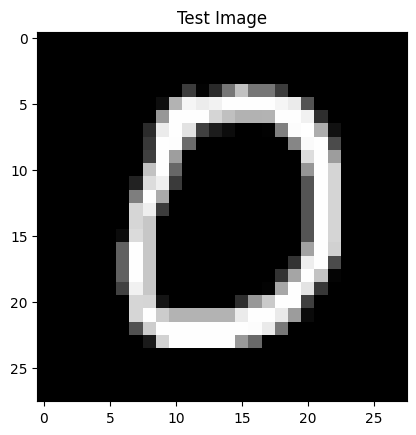

In [103]:
test_img = X_test[10]
# VE HINH ANH TEST
img = Image.fromarray((test_img.squeeze() * 255).astype('uint8'))
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.show()

Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [104]:
test_img = np.expand_dims(test_img, 0)
preds = model.predict(test_img)
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[9.9997425e-01, 6.3938362e-11, 4.2729994e-06, 2.3142834e-09,
        3.5618921e-14, 5.5742060e-08, 1.5821014e-07, 6.1994987e-10,
        1.9520132e-06, 1.9330553e-05]], dtype=float32)

In [105]:
test_pred = np.argmax(preds)
print(f"Predicted class = {test_pred}")

Predicted class = 0
